In [1]:
#Importing Relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('shopping_trends_updated.csv')

In [3]:
#Reading the first five rows
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
#A quick Analysis of the dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [9]:

# Check for duplicates
print(df.duplicated().sum())

0


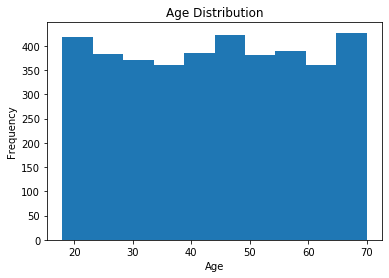

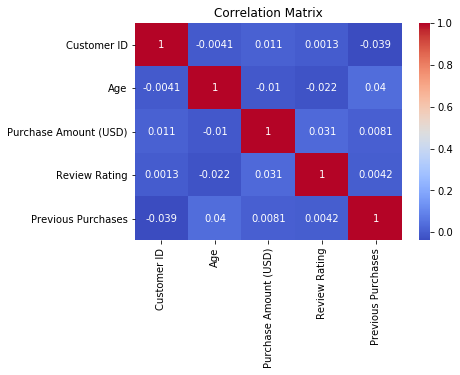

In [12]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Age
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

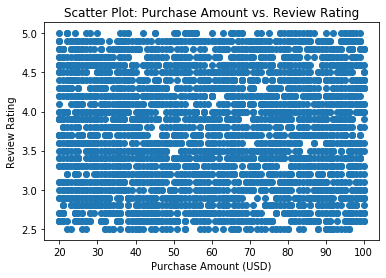

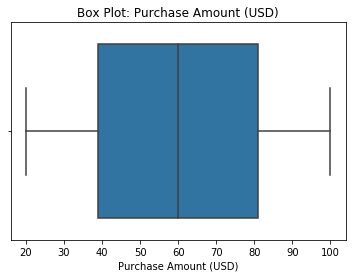

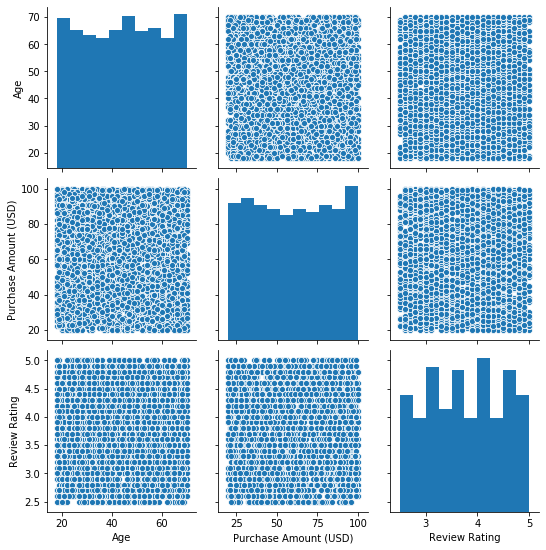

In [15]:
# Scatter plot between 'Purchase Amount (USD)' and 'Review Rating'
plt.scatter(df['Purchase Amount (USD)'], df['Review Rating'])
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.title('Scatter Plot: Purchase Amount vs. Review Rating')
plt.show()

#  Box plot for 'Purchase Amount (USD)'
sns.boxplot(df['Purchase Amount (USD)'])
plt.title('Box Plot: Purchase Amount (USD)')
plt.show()

# Feature Relationships
# Pair plot of numeric features
sns.pairplot(df[['Age', 'Purchase Amount (USD)', 'Review Rating']])
plt.show()


In [16]:
# 1Segmentation
#Analyze data for each 'Category' separately
category_groups = df.groupby('Category')
for category, group in category_groups:
    print(f"Category: {category}")
    print(group.describe())

Category: Accessories
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  1240.000000  1240.000000             1240.00000    1240.000000   
mean   1945.501613    44.224194               59.83871       3.768629   
std    1123.902693    15.239060               23.30123       0.715317   
min      10.000000    18.000000               20.00000       2.500000   
25%     986.750000    31.000000               39.75000       3.200000   
50%    1938.500000    44.000000               60.00000       3.800000   
75%    2934.250000    57.000000               80.00000       4.400000   
max    3900.000000    70.000000              100.00000       5.000000   

       Previous Purchases  
count         1240.000000  
mean            25.725806  
std             14.541882  
min              1.000000  
25%             13.000000  
50%             26.000000  
75%             39.000000  
max             50.000000  
Category: Clothing
       Customer ID          Age  Purchase Amount 

In [19]:
from scipy.stats import ttest_ind

# Example: Conduct a t-test to compare 'Purchase Amount' for two groups (e.g., Male and Female)
group1 = df[df['Gender'] == 'Male']['Purchase Amount (USD)']
group2 = df[df['Gender'] == 'Female']['Purchase Amount (USD)']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')



T-Statistic: -0.8769152065030424
P-Value: 0.38058673555268097


### Interpreting the results and draw conclusions based on formulated hypothesis

T-Statistic (-0.877): The t-statistic measures the difference between the means of the two groups (Male and Female,
in this example) relative to the variation within each group.
A negative t-statistic suggests that the mean 'Purchase Amount' of the first group (likely Male) is slightly lower than the mean of the second group (likely Female). 
However, the magnitude of the t-statistic is less than 1, indicating a relatively small difference.

P-Value (0.381): The p-value represents the probability of observing a t-statistic as extreme as the one calculated, 
assuming that there is no true difference between the groups (i.e., null hypothesis is true). 
In this case, a p-value of 0.381 suggests that there is a 38.1% chance of observing such a difference (or a more extreme difference) 
between the groups purely by chance.

### Interpretation:

A common significance level (alpha) used to determine statistical significance is 0.05 (5%). 
If the p-value is less than alpha, you would reject the null hypothesis, indicating that there is a statistically significant difference between the groups.
In your case, the p-value (0.381) is greater than 0.05, which means you fail to reject the null hypothesis. 
This suggests that there is not enough evidence to conclude that there is a statistically significant difference in the 'Purchase Amount' between the Male and Female groups.


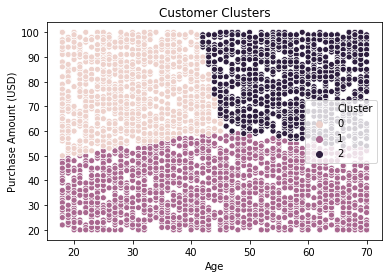

In [21]:
from sklearn.cluster import KMeans

# Example: Clustering customers based on 'Age' and 'Purchase Amount (USD)'
X = df[['Age', 'Purchase Amount (USD)']]

kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Cluster')
plt.title('Customer Clusters')
plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (assuming it's in a variable named 'df')
# You should include the relevant columns in the 'X' feature set and 'y' target variable
# For this example, we'll use 'Age' and 'Review Rating' as features to predict 'Purchase Amount'
X = df[['Age', 'Review Rating']]
y = df['Purchase Amount (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 562.2494662957721
R-squared (R2) Score: -0.004766223232418154


### Possible explanation

A high MSE and a negative R2 score suggest that the linear regression model you applied to predict 'Purchase Amount' using 
'Age' and 'Review Rating' is not performing well. 
The model's predictions are not accurate, and the model is essentially unable to explain or predict the 
variations in 'Purchase Amount' using these two features.
Possible Reasons for Poor Performance:

The linear relationship between 'Age' and 'Review Rating' and 'Purchase Amount' may not be strong,
and other features could be more influential.
The dataset may have high noise or outliers.
The model may not be capturing complex patterns in the data, and a different model or feature engineering
might be necessary.
"""